In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
clicked_prospects=pd.read_csv('../datasets/clicked_data/clicked_prospects.csv')

In [5]:
not_clicked_prospects=pd.read_csv('../datasets/clicked_data/not_clicked_prospects.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_29508\1200675871.py:1: DtypeWarning: Columns (3,7,10,13,14,15,22,26,27,28,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  not_clicked_prospects=pd.read_csv('../datasets/clicked_data/not_clicked_prospects.csv')


In [7]:
pd.options.display.max_columns=None
pd.options.display.max_info_columns=1000

In [49]:
clicked_prospects.drop(columns=['Unnamed: 0'],inplace=True)

In [51]:
not_clicked_prospects.drop(columns=['Unnamed: 0'],inplace=True)

In [53]:
clicked_prospects.shape

(9521, 48)

In [55]:
not_clicked_prospects.shape

(148051, 44)

In [57]:
for feature in clicked_prospects.columns:
    if feature not in not_clicked_prospects.columns:
        print(feature)

email_clicked_time
status
last_email_opened_date
last_email_status


In [59]:
clicked_prospects.drop(columns=['email_clicked_time','status','last_email_opened_date','last_email_status'],inplace=True)

In [63]:
clicked_prospects['is_clicked_email']=1

In [65]:
not_clicked_prospects['is_clicked_email']=0

In [67]:
clicked_prospects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9521 entries, 0 to 9520
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   derived_mail                    9521 non-null   object 
 1   Company Name                    9466 non-null   object 
 2   First Name                      9466 non-null   object 
 3   Middle Name                     287 non-null    object 
 4   Last Name                       9466 non-null   object 
 5   Title                           9466 non-null   object 
 6   Level                           8141 non-null   object 
 7   Seniority                       152 non-null    object 
 8   Department                      8141 non-null   object 
 9   Email ID                        8037 non-null   object 
 10  Email 1                         1429 non-null   object 
 11  Contact_City                    8540 non-null   object 
 12  Contact_State                   75

In [121]:
final_df=pd.concat([clicked_prospects,not_clicked_prospects], ignore_index=True)

In [124]:
final_df

,derived_mail,Company Name,First Name,Middle Name,Last Name,Title,Level,Seniority,Department,Email ID,Email 1,Contact_City,Contact_State,Contact City,Contact State,Contact Country,Country,Website,Company City,Company State,Company Country,Industry,Sub Industry,Revenue,Revenue Range,EMP Range,Company Annual Revenue,Company Industry,Company Staff Count Range,Company Staff Count,Contact Linkedin URL,Contact LI Profile URL,source,Email,total_emails_sent,total_emails_opened,total_emails_clicked,total_emails_bounced,total_emails_unsubscribed,avg_time_between_emails,avg_time_between_emails_opened,days_since_last_email_opened,total_emails_sent_week_ends,has_ever_opened_email,is_clicked_email
0,a-holley@ti.com,Texas Instruments,Ashley,NaN,Holley,Creative Operations Manager,Mgr,NaN,Operations,a-holley@ti.com,NaN,Dallas,TX,NaN,NaN,NaN,United States,www.ti.com,Dallas,TX,United States,Manufacturing,NaN,$17.5B,10B+,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/ashleyjholley,NaN,../datasets/latest_dataset/Schneider_Electric_...,a-holley@ti.com,23.0,1.0,1.0,0.0,0.0,1.318182,NaN,0.0,5.0,1,1
1,a-smith3@ti.com,Texas Instruments,Amanda,NaN,Smith,Vice President Analog Power Products Supply Ch...,VP,NaN,Operations,a-smith3@ti.com,NaN,Dallas,TX,NaN,NaN,NaN,United States,www.ti.com,Dallas,TX,United States,Manufacturing,NaN,$17.5B,10B+,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/amanda-smith-8b11475,NaN,../datasets/latest_dataset/Schneider_Electric_...,a-smith3@ti.com,17.0,1.0,1.0,0.0,0.0,0.937500,NaN,0.0,2.0,1,1
2,a.danielson@aps.com,Arizona Public Service - APS,A,Justin,Danielson,"Manager, Procurement Operations",Manager,Manager,Operations,NaN,a.danielson@aps.com,Phoenix,Arizona,Phoenix,Arizona,United States,NaN,aps.com,Phoenix,Arizona,United States,NaN,NaN,NaN,NaN,NaN,$4.3B,"Electricity, Oil & Gas",NaN,5772.0,NaN,https://www.linkedin.com/in/ACoAAAJI_i0B-tDLCl...,../datasets/latest_dataset/Schneider_Electric_...,a.danielson@aps.com,12.0,1.0,1.0,0.0,0.0,1.181818,NaN,0.0,2.0,1,1
3,a.freitas@samsung.com,Samsung,Alex,NaN,Freitas,Sr Director of PMO and Operations,Dir,NaN,Operations,a.freitas@samsung.com,NaN,Dallas,TX,NaN,NaN,NaN,United States,www.samsung.com,Ridgefield Park,NJ,United States,Manufacturing,NaN,$197B,10B+,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/alexfreitas,NaN,../datasets/latest_dataset/Schneider_Electric_...,a.freitas@samsung.com,57.0,1.0,1.0,0.0,0.0,0.857143,NaN,0.0,9.0,1,1
4,a.khani@samsung.com,Samsung,Aamer,NaN,Khani,Director Software Engineering,Dir,NaN,IT,a.khani@samsung.com,NaN,Dublin,CA,NaN,NaN,NaN,United States,www.samsung.com,NaN,NaN,NaN,Manufacturing,NaN,$197B,10B+,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/aamer-khani-3225719,NaN,../datasets/latest_dataset/Schneider_Electric_...,a.khani@samsung.com,57.0,1.0,1.0,0.0,0.0,0.857143,NaN,0.0,9.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157567,pte@ti.com,Texas Instruments,Pe,NaN,Te,Vice President,VP,NaN,Operations,pte@ti.com,NaN,Dallas,TX,NaN,NaN,NaN,United States,www.ti.com,Dallas,TX,United States,Manufacturing,NaN,$17.5B,10B+,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/ACwAAE9nXIMBLPQv_Y...,NaN,../datasets/latest_dataset/Schneider_Electric_...,pte@ti.com,10.0,0.0,0.0,0.0,0.0,0.888889,NaN,NaN,1.0,0,0
157568,thorton@ti.com,Texas Instruments,Tim,NaN,Horton,Vice President,VP,NaN,Operations,thorton@ti.com,NaN,Dallas,TX,NaN,NaN,NaN,United States,www.ti.com,Dallas,TX,United States,Manufacturing,NaN,$17.5B,10B+,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/ACwAAEzMAHkBtTFP5x...,NaN,../datasets/latest_dataset/Schneider_Electric_...,thorton@ti.com,10.0,0.0,0.0,0.0,0.0,0.888889,NaN,NaN,1.0,0,0
157569,rduhon@ti.com,Texas Instruments,Robert,NaN,Duhon,owner/operator,CXO,NaN,Operations,rduhon@ti.com,NaN,Whitewright,TX,NaN,NaN,NaN,United States,www.ti.com,Dallas,TX,United States,Manufacturing,Na

<Axes: xlabel='is_clicked_email', ylabel='count'>

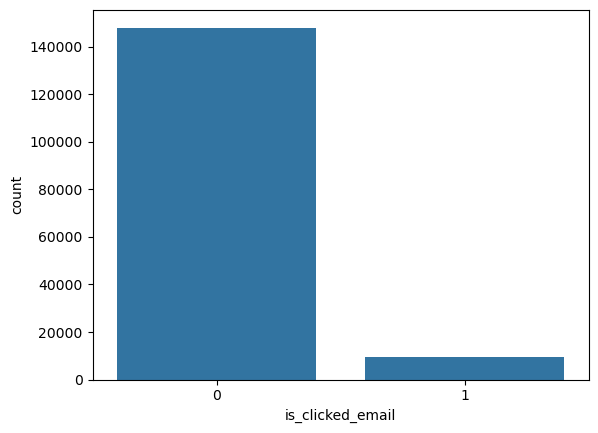

In [127]:
sns.countplot(x='is_clicked_email',data=final_df)

<Axes: xlabel='has_ever_opened_email', ylabel='count'>

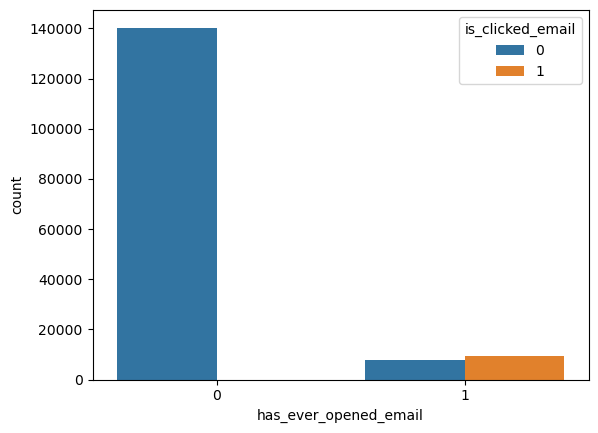

In [77]:
sns.countplot(x='has_ever_opened_email',hue='is_clicked_email',data=final_df)

In [79]:
final_df.columns

Index(['derived_mail', 'Company Name', 'First Name', 'Middle Name',
       'Last Name', 'Title', 'Level', 'Seniority', 'Department', 'Email ID',
       'Email 1', 'Contact_City', 'Contact_State', 'Contact City',
       'Contact State', 'Contact Country', 'Country', 'Website',
       'Company City', 'Company State', 'Company Country', 'Industry',
       'Sub Industry', 'Revenue', 'Revenue Range', 'EMP Range',
       'Company Annual Revenue', 'Company Industry',
       'Company Staff Count Range', 'Company Staff Count',
       'Contact Linkedin URL', 'Contact LI Profile URL', 'source', 'Email',
       'total_emails_sent', 'total_emails_opened', 'total_emails_clicked',
       'total_emails_bounced', 'total_emails_unsubscribed',
       'avg_time_between_emails', 'avg_time_between_emails_opened',
       'days_since_last_email_opened', 'total_emails_sent_week_ends',
       'has_ever_opened_email', 'is_clicked_email'],
      dtype='object')

In [85]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157572 entries, 0 to 148050
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   derived_mail                    157572 non-null  object 
 1   Company Name                    157130 non-null  object 
 2   First Name                      157516 non-null  object 
 3   Middle Name                     5889 non-null    object 
 4   Last Name                       157492 non-null  object 
 5   Title                           157512 non-null  object 
 6   Level                           147641 non-null  object 
 7   Seniority                       2876 non-null    object 
 8   Department                      147641 non-null  object 
 9   Email ID                        144938 non-null  object 
 10  Email 1                         12579 non-null   object 
 11  Contact_City                    134574 non-null  object 
 12  Contact_State        

In [83]:
final_df['days_since_last_email_opened']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
148046    NaN
148047    NaN
148048    NaN
148049    NaN
148050    NaN
Name: days_since_last_email_opened, Length: 157572, dtype: float64

<Axes: xlabel='total_emails_sent_week_ends', ylabel='Density'>

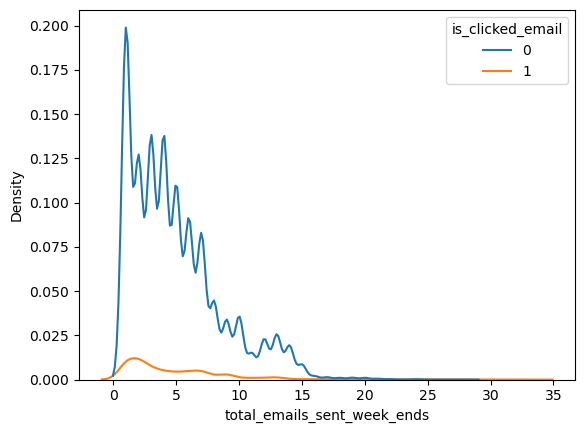

In [131]:
sns.kdeplot(x='total_emails_sent_week_ends',data=final_df,hue='is_clicked_email')

<Axes: xlabel='total_emails_opened', ylabel='Density'>

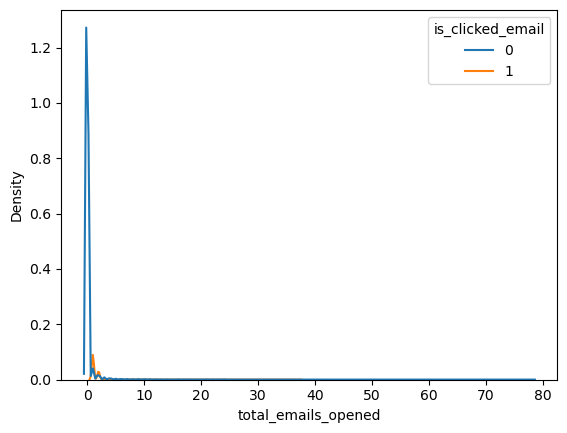

In [133]:
sns.kdeplot(x='total_emails_opened',data=final_df,hue='is_clicked_email')

In [117]:
print(final_df.columns[final_df.columns.duplicated()])

Index([], dtype='object')


In [119]:
print(final_df.index[final_df.index.duplicated()])


Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9511, 9512, 9513, 9514, 9515, 9516, 9517, 9518, 9519, 9520],
      dtype='int64', length=9521)


<Axes: xlabel='total_emails_unsubscribed', ylabel='Density'>

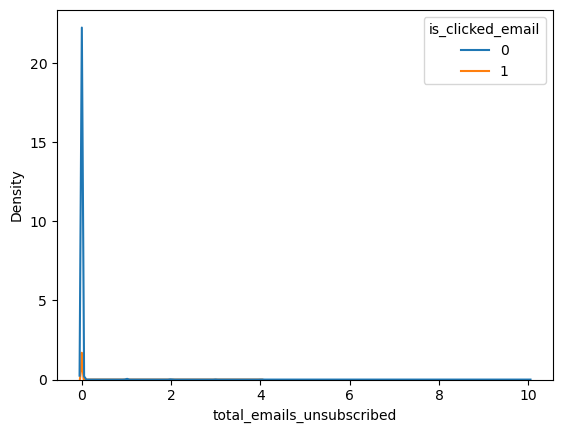

In [135]:
sns.kdeplot(x='total_emails_unsubscribed',data=final_df,hue='is_clicked_email')

In [137]:
final_df['has_ever_unsubscribed_email']=final_df['total_emails_unsubscribed'].apply(lambda x : 1 if x>0 else 0)

<Axes: xlabel='has_ever_unsubscribed_email', ylabel='count'>

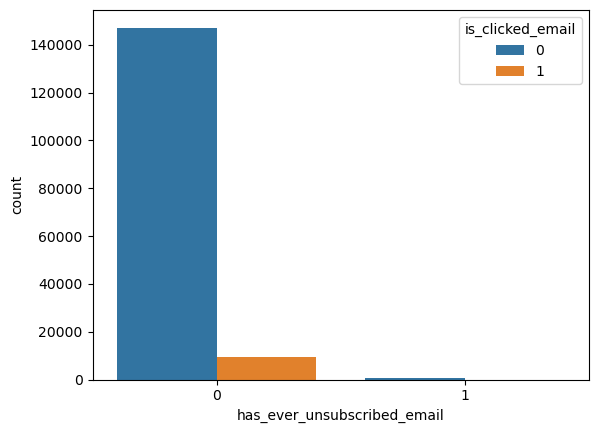

In [141]:
sns.countplot(x='has_ever_unsubscribed_email',data=final_df,hue='is_clicked_email')

In [156]:
final_df.to_csv('../datasets/clicked_data/final_dataset.csv')

In [158]:
final_df.columns

Index(['derived_mail', 'Company Name', 'First Name', 'Middle Name',
       'Last Name', 'Title', 'Level', 'Seniority', 'Department', 'Email ID',
       'Email 1', 'Contact_City', 'Contact_State', 'Contact City',
       'Contact State', 'Contact Country', 'Country', 'Website',
       'Company City', 'Company State', 'Company Country', 'Industry',
       'Sub Industry', 'Revenue', 'Revenue Range', 'EMP Range',
       'Company Annual Revenue', 'Company Industry',
       'Company Staff Count Range', 'Company Staff Count',
       'Contact Linkedin URL', 'Contact LI Profile URL', 'source', 'Email',
       'total_emails_sent', 'total_emails_opened', 'total_emails_clicked',
       'total_emails_bounced', 'total_emails_unsubscribed',
       'avg_time_between_emails', 'avg_time_between_emails_opened',
       'days_since_last_email_opened', 'total_emails_sent_week_ends',
       'has_ever_opened_email', 'is_clicked_email',
       'has_ever_unsubscribed_email'],
      dtype='object')